In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-12-09 / Aki Taanila


## Tilastollisia tunnuslukuja grafiikkana

Tässä muistiossa käytän **seaborn**-funktioita **boxplot** ja **catplot**.

**boxplot** havainnollistaa määrällisen muuttujan arvojen jakaumaa ja sillä on monta nimeä: box & whisker, ruutu- ja janakaavio, laatikko- ja viiksikaavio, tai laatikko- ja janakaavio. Kaavio esittää viiden luvun yhteenvedon:

* pienin arvo
* alaneljännes/alakvartiili (arvo, jota pienmpiä on neljäsosa arvoista)
* mediaani (arvo, jota pienempiä on puolet arvoista)
* yläneljännes/yläkvartiili (arvo, jota pienempiä on kolme neljäsosaa arvoista
* suurin arvo

Lisäksi kaaviossa esitetään muista arvoista selvästi poikkeavat arvot erillisinä pisteinä, jotta niihin osataan kiinnittää huomiota.

Kaavio koostuu laatikosta, jonka reunat vastaavat alaneljännestä ja yläneljännestä. Laatikon sisään on merkitty viivalla mediaanin paikka. Laatikon päistä lähtee janat, joiden päätepisteet vastaavat pienintä ja suurinta arvoa paitsi silloin kun selvästi muista poikkeavia arvoja on merkitty erillisillä pisteillä. Oletuksena erillisinä pisteinä piirretään havainnot, jotka ovat yli 1,5 kvartiilivälin (yläneljännes-alaneljännes) päässä laatikon reunasta.

Kaavioiden muotoiluun käytän **matplotlib.pyplot-funktioita**. Jos kaipaat lisää muotoiluja, niin lue https://matplotlib.org/stable/tutorials/introductory/pyplot.html

Seabornin boxplotista löydät lisätietoa https://seaborn.pydata.org/generated/seaborn.boxplot.html 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

penguins = sns.load_dataset('penguins')    # Tietoja pingviineistä
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## boxplot

Text(0.5, 1.0, 'Pingviinien nokan pituus')

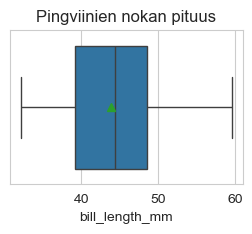

In [3]:
plt.figure(figsize=(3, 2))
# showmeans-parametrin ansiosta myös keskiarvo näytetään kaaviossa (kolmio)
sns.boxplot(data=penguins, x='bill_length_mm', showmeans=True)

plt.title('Pingviinien nokan pituus')

## Useamman muuttujan boxplot

Voin esittää useamman muuttujan boxplotin antamalla muuttujat **data**-parametrin arvona.

Text(0.5, 1.0, 'Nokan pituus ja leveys')

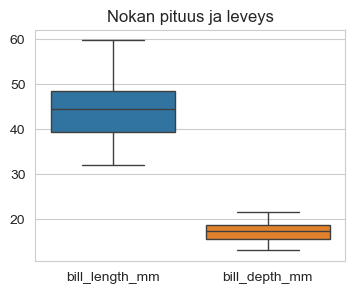

In [4]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=penguins[['bill_length_mm', 'bill_depth_mm']])

plt.title('Nokan pituus ja leveys')

## boxplot kategorisen muuttujan määräämissä ryhmissä

<Axes: xlabel='species', ylabel='bill_length_mm'>

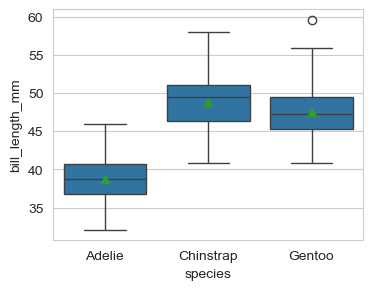

In [5]:
plt.figure(figsize=(4, 3))
# Kategorisena muuttujana species (alalaji)
sns.boxplot(data=penguins, x='species', y='bill_length_mm', showmeans=True)

<Axes: xlabel='sex', ylabel='bill_length_mm'>

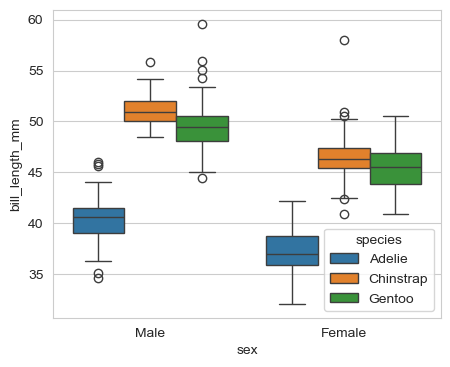

In [6]:
plt.figure(figsize=(5, 4))
# Kategorinen muuttuja voidaan sijoittaa myös hue-parametriksi
sns.boxplot(data=penguins, x='sex', y='bill_length_mm', hue='species')

## catplot

**catplot** mahdollistaa määrällisen muuttujan boxplotin tarkastelun kategoristen muuttujien määrittämissä ryhmissä. **kind**-parametrin arvo **'box'** määrittää että kaaviolajina on **boxplot**.

Seuraavassa tarkastelen pingviinien nokan pituutta alalajin (**species**) määrittämissä ryhmissä (edellisessä solussa sama tarkastelu oli toisella tavalla toteutettuna).

Lisätietoa https://seaborn.pydata.org/generated/seaborn.catplot.html

**catplot** tuottaa **Facetgrid**-luokan olion, jolla on omat funktionsa otsikointien ym. ominaisuuksien muotoiluun.
Lisätietoa https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

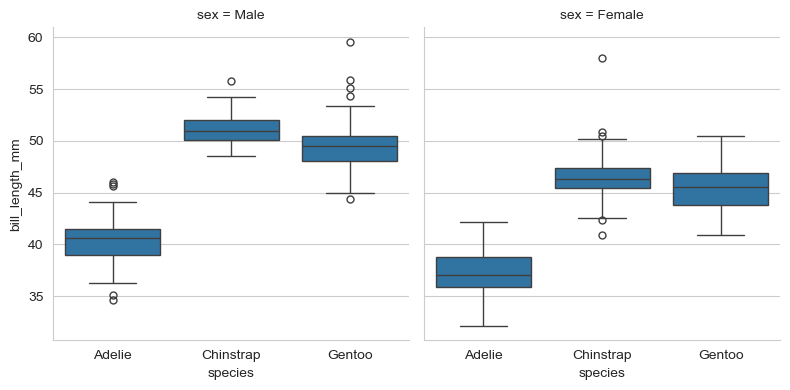

In [7]:
sns.catplot(data=penguins, y='bill_length_mm', x='species', col='sex', kind='box', height=4)

## N-arvot!

Tilastollisten tunnuslukujen laskennassa mukana olleiden arvojen lukumäärä täytyy aina tunnuslukuja käytettäessä laskea ja tunnuslukuja raportoitaessa n-arvojen täytyy olla näkyvillä. Pienten n-arvojen kohdalla tunnuslukuihin täytyy suhtautua varoen.

N-arvot voin selvittää **pandas**-funktiolla **count**. Seuraavassa muutama esimerkki.

In [8]:
# Yksittäisten muuttujien n-arvot
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [9]:
# Muuttujien n-arvot alalajin mukaan
penguins.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


In [10]:
# Muuttujien n-arvot alalajin ja sukupuolen mukaan
penguins.groupby(['species', 'sex']).count()

island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex                                                                
Adelie    Female      73              73             73                 73   
          Male        73              73             73                 73   
Chinstrap Female      34              34             34                 34   
          Male        34              34             34                 34   
Gentoo    Female      58              58             58                 58   
          Male        61              61             61                 61   

                  body_mass_g  
species   sex                  
Adelie    Female           73  
          Male             73  
Chinstrap Female           34  
          Male             34  
Gentoo    Female           58  
          Male             61